<div style="color:white;font-size:50px;font-weight:bolder;background-color:black;text-align:center;padding:15px 0px;border-radius:20px">Breast Cancer Classification</div> 

![](https://rockethealth.africa/wp-content/uploads/2021/10/wHAT-YOU-NEED-TO-KNOW-ABOUT-BREAST-CANCER.jpg)

<div style="color:white;font-size:25px;font-weight:bolder;background-color:black;text-align:center;padding:15px 0px;border-radius:20px">Reading data</div> 

<div style="color:blue;font-size:20px;font-weight:bolder">Import The Main Libiraries</div> 

In [1]:
# Most important libiraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
import os
import plotly.express as px

<div style="color:blue;font-size:20px;font-weight:bolder">Load The DataSet</div> 

In [2]:
## Read the Csv file
data = pd.read_csv("../input/breast-cancer-dataset/breast-cancer.csv")

In [3]:
# Take a copy from dataframe to "df_air"
df=data.copy()

<div style="color:blue;font-size:20px;font-weight:bolder">Inspect The Data</div> 

In [4]:
# Show the head of the dataFrame 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Show the Tail of the dataFrame 
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


<div style="color:blue;font-size:20px;font-weight:bolder">Explore The Data</div> 

In [6]:
# Number of rows and columns 
df.shape

(569, 32)

In [7]:
# Summary to all columns 
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

,column,dtypes,nunique,sum_null
0,id,int64,569,0
1,diagnosis,object,2,0
2,radius_mean,float64,456,0
3,texture_mean,float64,479,0
4,perimeter_mean,float64,522,0
5,area_mean,float64,539,0
6,smoothness_mean,float64,474,0
7,compactness_mean,float64,537,0
8,concavity_mean,float64,537,0
9,concave points_mean,float64,542,0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


<div style="color:blue;font-size:20px;font-weight:bolder">Discovering Missing Values</div> 

In [9]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

> ##### their is no missing values in the dataset

<div style="color:blue;font-size:20px;font-weight:bolder">Discovering duplicate rows </div> 

In [10]:
df.duplicated().sum()

0

> ##### Thir is No duplicates in rows

<div style="color:blue;font-size:20px;font-weight:bolder">Encoding For object features</div> 

In [11]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [12]:
df = df.drop("id",axis=1)

<div style="color:white;font-size:25px;font-weight:bolder;background-color:black;text-align:center;padding:15px 0px;border-radius:20px"> Modeling part </div> 

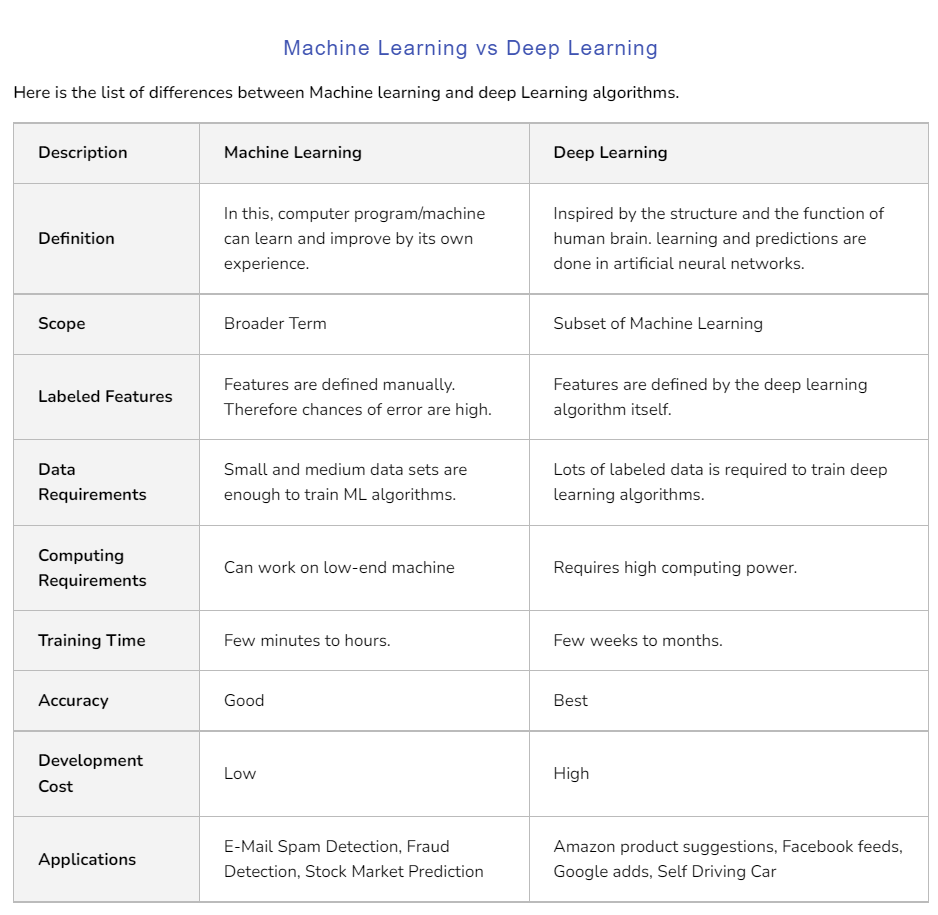

# What are artificial neural networks?
An artificial neuron network (ANN) is a computational model based on the structure and functions of biological neural networks. Information that flows through the network affects the structure of the ANN because a neural network changes - or learns, in a sense - based on that input and output. ANNs are considered nonlinear statistical data modeling tools where the complex relationships between inputs and outputs are modeled or patterns are found. ANN is also known as a neural network.

<div style="color:blue;font-size:20px;font-weight:bolder">import keras</div> 

In [13]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

<div style="color:blue;font-size:20px;font-weight:bolder">Splitting the dataset into the Training set and Test set</div> 

In [14]:
X = df.drop("diagnosis",axis=1)
y = df["diagnosis"]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

<div style="color:blue;font-size:20px;font-weight:bolder">Feature Scaling</div> 

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<div style="color:blue;font-size:20px;font-weight:bolder">Defining the model </div> 

In [17]:
model = Sequential()
model.add(Dense(6, activation='relu', input_shape=(30,)))
model.add(Dense(2, activation='sigmoid'))

2022-10-15 10:31:40.468783: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 186       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 14        
Total params: 200
Trainable params: 200
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])

In [20]:
model.fit(X_train, y_train, batch_size=50, epochs=100)

2022-10-15 10:31:40.756627: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
8/8 [==============================] - 1s 2ms/step - loss: 0.7012 - accuracy: 0.5930
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6037 - accuracy: 0.6658
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.7111
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4998 - accuracy: 0.7764
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.8141
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.8367
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4161 - accuracy: 0.8492
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.8693
Epoch 9/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3784 - accuracy: 0.8744
Epoch 10/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3628 - accuracy: 0.8794
Epoch 11/100
8/8 [===========

In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1308 - accuracy: 0.9474


In [22]:
print('Test accuracy:', round(test_acc,4))

Test accuracy: 0.9474


In [23]:
predictions = model.predict(X_test)

In [24]:
print(predictions[0])
print(np.argmax(predictions[0]))

print(predictions[1])
print(np.argmax(predictions[1]))

print(predictions[2])
print(np.argmax(predictions[2]))

print(predictions[3])
print(np.argmax(predictions[3]))

[0.28433573 0.93320394]
1
[0.5843292 0.1954354]
0
[0.9454703  0.03716305]
0
[0.71620685 0.17099759]
0


<div style="color:white;font-size:35px;font-weight:bolder;background-color:black;text-align:center;padding:15px 0px;border-radius:20px"> End </div> 